<div style="background-color: #00796B; text-align: center; padding: 20px;">
    <p style="color: white; font-size: 36px;">CIFAR Dataset</p>
    <p style="color: white;">by: Muhammad Ali Zulfikar</p>
</div>

<div style="background-color: #00796B; text-align: center; padding: 5px;">
    <p style="color: white; font-size: 36px;">Library Area</p>
</div>

In [40]:
import tensorflow as tf
from keras import datasets, models
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
import keras
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Activation
import os

<div style="background-color: #00796B; text-align: center; padding: 5px;">
    <p style="color: white; font-size: 36px;">Method</p>
</div>

In [37]:
def plot_label_distribution(title, label_distribution, ax):
    colors = plt.cm.jet(np.linspace(0, 1, 10))
    bars = ax.bar(range(10), label_distribution, color=colors)
    ax.set_xticks(range(10))
    ax.set_xticklabels([str(i) for i in range(10)])
    ax.set_xlabel("Label")
    ax.set_ylabel("Count")
    ax.set_title(title)
    label_names = [f"Label {i}" for i in range(10)]
    ax.legend(bars, label_names)

<div style="background-color: #00796B; text-align: center; padding: 5px;">
    <p style="color: white; font-size: 36px;">Load Dataset</p>
</div>

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

<div style="background-color: #00796B; text-align: center; padding: 5px;">
    <p style="color: white; font-size: 36px;">Check for Distribution Data</p>
</div>

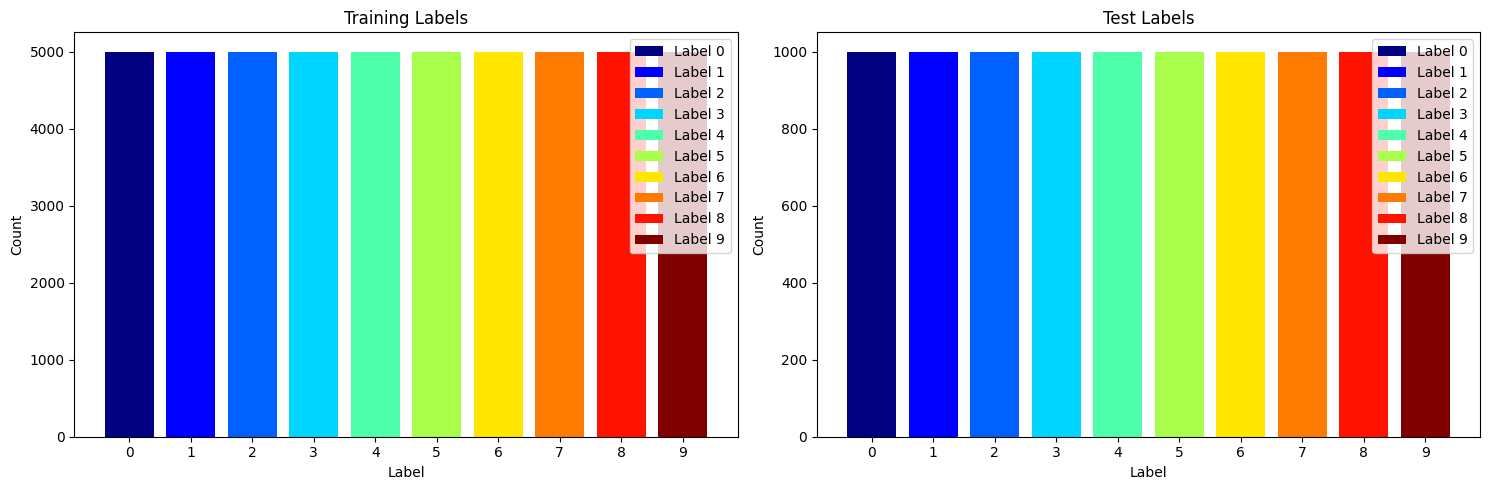

In [53]:
train_label_distribution = np.bincount(train_labels.reshape(-1))
test_label_distribution = np.bincount(test_labels.reshape(-1))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

plot_label_distribution("Training Labels", train_label_distribution, ax1)
plot_label_distribution("Test Labels", test_label_distribution, ax2)

plt.tight_layout()
plt.show()

In [49]:
x_train = train_images.astype('float32')
x_test = train_labels.astype('float32')

In [50]:
y_train = keras.utils.to_categorical(test_images, 10)
y_test = keras.utils.to_categorical(test_labels, 10)

In [43]:
#define the convnet
model = Sequential()
# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# FLATTERN => DENSE => RELU => DROPOUT
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# a softmax classifier
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                      

In [45]:
opt = keras.optimizers.RMSprop(learning_rate=0.0001)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [52]:
history = model.fit(train_images, train_labels,
              epochs=20,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/20


ValueError: in user code:

    File "c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1081, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1139, in compute_loss
        return self.compiled_loss(
    File "c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\losses.py", line 2122, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend.py", line 5560, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 10) are incompatible


In [8]:
model.compile(optimizer='adam',
     loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
     metrics=['accuracy'])

In [9]:
history = model.fit(train_images, train_labels, epochs=10,  validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 31s 19ms/step - loss: 1.5345 - accuracy: 0.4385 - val_loss: 1.2903 - val_accuracy: 0.5290
Epoch 2/10
1563/1563 [==============================] - 32s 21ms/step - loss: 1.1631 - accuracy: 0.5877 - val_loss: 1.0716 - val_accuracy: 0.6188
Epoch 3/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.0162 - accuracy: 0.6433 - val_loss: 0.9980 - val_accuracy: 0.6450
Epoch 4/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.9140 - accuracy: 0.6797 - val_loss: 0.9499 - val_accuracy: 0.6666
Epoch 5/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.8450 - accuracy: 0.7038 - val_loss: 0.8833 - val_accuracy: 0.6967
Epoch 6/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.7820 - accuracy: 0.7260 - val_loss: 0.8937 - val_accuracy: 0.6925
Epoch 7/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.7266 - accuracy: 0.7451 - val_loss: 0.8426 -

313/313 - 2s - loss: 0.8848 - accuracy: 0.7146 - 2s/epoch - 7ms/step


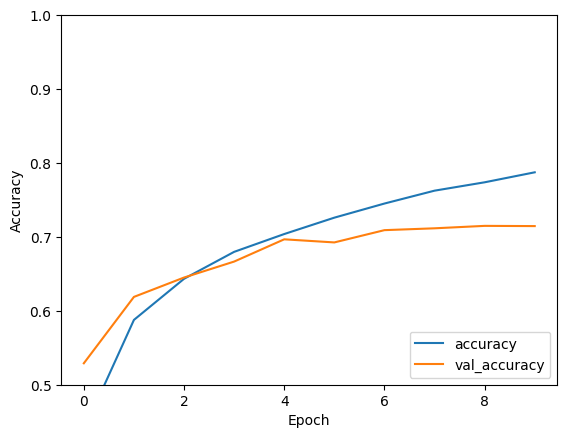

In [11]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

In [12]:
print(test_acc)

0.7146000266075134
